<a href="https://colab.research.google.com/github/EDisarz/deteccao-animais/blob/main/detec%C3%A7%C3%A3o_animais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install roboflow
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 132.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.3 MB/s eta 0:00:00
  

In [9]:
from roboflow import Roboflow

rf = Roboflow(api_key="msIoIN1feEbp2GDy7l87")
project = rf.workspace("eduardo-gv3wk").project("detecta-animais")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to detecta-animais-1 in yolov8:: 100%|██████████| 412/412 [00:00<00:00, 7334.29it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
!ls {dataset.location}
!cat {dataset.location}/data.yaml


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
names:
- boi
- cavalo
nc: 2
roboflow:
  license: CC BY 4.0
  project: detecta-animais
  url: https://universe.roboflow.com/eduardo-gv3wk/detecta-animais/dataset/1
  version: 1
  workspace: eduardo-gv3wk
test: ../test/images
train: ../train/images
val: ../valid/images


In [11]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")


100%|██████████| 6.25M/6.25M [00:00<00:00, 357MB/s]


In [12]:
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=100,
    imgsz=640,
    batch=16,
    plots=True
)


Ultralytics 8.3.157 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/detecta-animais-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

100%|██████████| 755k/755k [00:00<00:00, 109MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 379MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.1±0.1 ms, read: 1281.8±773.5 MB/s, size: 56.0 KB)


train: Scanning /content/detecta-animais-1/train/labels... 140 images, 0 backgrounds, 0 corrupt: 100%|██████████| 140/140 [00:00<00:00, 2460.37it/s]

train: New cache created: /content/detecta-animais-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 824.9±555.2 MB/s, size: 63.0 KB)


val: Scanning /content/detecta-animais-1/valid/labels... 40 images, 0 backgrounds, 0 corrupt: 100%|██████████| 40/40 [00:00<00:00, 3493.22it/s]

val: New cache created: /content/detecta-animais-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.03G      1.242      2.974      1.421         50        640: 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]

                   all         40         95    0.00779       0.96      0.321      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.51G      1.202      2.223      1.339         37        640: 100%|██████████| 9/9 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.76it/s]

                   all         40         95       0.56      0.306      0.438      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.54G      1.117      1.789      1.283         48        640: 100%|██████████| 9/9 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.73it/s]

                   all         40         95      0.677      0.254      0.545      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.55G      1.145      1.714      1.288         47        640: 100%|██████████| 9/9 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         40         95      0.487      0.523      0.606      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.57G      1.174      1.519      1.319         49        640: 100%|██████████| 9/9 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.69it/s]

                   all         40         95      0.632      0.682       0.71      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.59G      1.244      1.512      1.348         49        640: 100%|██████████| 9/9 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]

                   all         40         95      0.907      0.642      0.776      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.61G      1.195      1.486       1.29         58        640: 100%|██████████| 9/9 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.70it/s]

                   all         40         95      0.549       0.49      0.491      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.62G      1.201      1.407        1.3         43        640: 100%|██████████| 9/9 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         40         95      0.746      0.607      0.738       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.64G      1.174      1.387      1.299         45        640: 100%|██████████| 9/9 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         40         95      0.828      0.551      0.676      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.66G       1.12      1.314      1.261         53        640: 100%|██████████| 9/9 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         40         95      0.663      0.715      0.713      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.67G      1.187      1.322       1.27         49        640: 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         40         95      0.635       0.53      0.588      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.69G      1.188      1.302      1.248         63        640: 100%|██████████| 9/9 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         40         95      0.705      0.298      0.409      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.71G      1.044      1.222       1.21         49        640: 100%|██████████| 9/9 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         40         95      0.533      0.428      0.431      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.72G      1.114      1.221      1.216         41        640: 100%|██████████| 9/9 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.04it/s]


                   all         40         95      0.794       0.52      0.652      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.74G      1.065      1.218      1.192         54        640: 100%|██████████| 9/9 [00:01<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         40         95      0.768       0.44        0.6       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.76G      1.002       1.18        1.2         59        640: 100%|██████████| 9/9 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         40         95      0.612      0.391      0.387      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.78G       1.04      1.179      1.227         45        640: 100%|██████████| 9/9 [00:01<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         40         95      0.248      0.173      0.193      0.084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.79G      1.094      1.139      1.223         50        640: 100%|██████████| 9/9 [00:02<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         40         95      0.451      0.293      0.286      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.81G      1.064      1.071      1.202         51        640: 100%|██████████| 9/9 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         40         95       0.48      0.444      0.352      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.83G      1.066      1.056      1.172         70        640: 100%|██████████| 9/9 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         40         95      0.588      0.441      0.476      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.84G     0.9965      1.007      1.176         54        640: 100%|██████████| 9/9 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         40         95      0.658      0.501      0.555      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.86G       1.06      1.098       1.22         64        640: 100%|██████████| 9/9 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]


                   all         40         95       0.82      0.687      0.761      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.88G      1.006      1.016      1.191         65        640: 100%|██████████| 9/9 [00:02<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         40         95      0.836      0.724      0.822      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.89G     0.9578     0.9475      1.133         58        640: 100%|██████████| 9/9 [00:01<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         40         95      0.854      0.817      0.893      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.91G     0.9716     0.9683      1.169         41        640: 100%|██████████| 9/9 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         40         95       0.94      0.845      0.896      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.93G      1.004     0.9515      1.188         45        640: 100%|██████████| 9/9 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.66it/s]

                   all         40         95      0.935      0.819      0.874      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.95G     0.9457     0.9787      1.159         35        640: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         40         95      0.892      0.872      0.891       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.96G     0.9525      0.958      1.154         54        640: 100%|██████████| 9/9 [00:01<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         40         95       0.76      0.822      0.864       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.98G     0.9941     0.9486      1.172         46        640: 100%|██████████| 9/9 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         40         95      0.718       0.74      0.782      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         3G     0.9952     0.9731      1.179         54        640: 100%|██████████| 9/9 [00:01<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         40         95      0.728      0.674      0.722       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.01G     0.9424     0.9127      1.143         44        640: 100%|██████████| 9/9 [00:02<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         40         95      0.745      0.781      0.849      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.03G     0.9078     0.8345      1.134         38        640: 100%|██████████| 9/9 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         40         95      0.771      0.713      0.739      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.05G     0.9577     0.8918      1.159         64        640: 100%|██████████| 9/9 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         40         95      0.956      0.709      0.838      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.06G     0.9231     0.8565      1.126         52        640: 100%|██████████| 9/9 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.25it/s]

                   all         40         95      0.928      0.828      0.922      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.08G     0.9578     0.9033       1.16         43        640: 100%|██████████| 9/9 [00:01<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         40         95      0.908      0.884      0.918       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       3.1G     0.9337     0.8327      1.142         41        640: 100%|██████████| 9/9 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         40         95       0.91      0.859      0.915      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.12G     0.9105     0.8113      1.121         41        640: 100%|██████████| 9/9 [00:01<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


                   all         40         95      0.885      0.776      0.874      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.13G     0.9045     0.8346      1.131         42        640: 100%|██████████| 9/9 [00:01<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         40         95      0.895      0.779      0.862      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.15G     0.9164     0.8165      1.145         50        640: 100%|██████████| 9/9 [00:01<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         40         95      0.754      0.778      0.827      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.17G     0.8775      0.768      1.111         55        640: 100%|██████████| 9/9 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]

                   all         40         95      0.898      0.721      0.852      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.19G     0.8322     0.7668      1.091         66        640: 100%|██████████| 9/9 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         40         95      0.885      0.835      0.887      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       3.2G     0.8924     0.7921      1.113         50        640: 100%|██████████| 9/9 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.29it/s]

                   all         40         95      0.864      0.805      0.855      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.22G     0.8764     0.8187      1.123         41        640: 100%|██████████| 9/9 [00:01<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         40         95        0.8      0.694      0.759      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.24G     0.8608     0.7644      1.113         44        640: 100%|██████████| 9/9 [00:01<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         40         95      0.826      0.719      0.824      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.25G     0.8188     0.7181      1.081         45        640: 100%|██████████| 9/9 [00:02<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         40         95      0.844      0.683      0.814      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.27G      0.827     0.6983      1.106         51        640: 100%|██████████| 9/9 [00:01<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         40         95      0.754      0.721        0.8      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.29G     0.8343     0.7391      1.081         51        640: 100%|██████████| 9/9 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         40         95       0.83      0.748      0.851      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       3.3G     0.8336     0.7249      1.076         66        640: 100%|██████████| 9/9 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all         40         95      0.908      0.824      0.921      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.32G     0.8164     0.7263      1.061         51        640: 100%|██████████| 9/9 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.10it/s]

                   all         40         95      0.912      0.828       0.93      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.34G     0.8249     0.7215      1.081         49        640: 100%|██████████| 9/9 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         40         95      0.903      0.749      0.901      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.36G      0.793     0.6933      1.059         45        640: 100%|██████████| 9/9 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         40         95      0.781      0.799      0.863      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.37G     0.7922     0.6905      1.064         40        640: 100%|██████████| 9/9 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         40         95      0.836      0.768      0.859      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.39G     0.7767      0.677      1.046         57        640: 100%|██████████| 9/9 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         40         95      0.845      0.817      0.885      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.41G     0.7935     0.6688      1.046         46        640: 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         40         95      0.888       0.89      0.902      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.42G     0.7748     0.6629      1.073         47        640: 100%|██████████| 9/9 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         40         95      0.949      0.863      0.919      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.44G     0.7943     0.6822      1.056         57        640: 100%|██████████| 9/9 [00:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         40         95      0.953      0.897      0.941      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.46G     0.8344     0.6893      1.116         60        640: 100%|██████████| 9/9 [00:01<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]

                   all         40         95      0.905      0.924      0.942      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.48G     0.7799      0.651      1.053         57        640: 100%|██████████| 9/9 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         40         95      0.965      0.837      0.943      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.49G     0.7585     0.6567      1.055         41        640: 100%|██████████| 9/9 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         40         95      0.926      0.859      0.931      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.51G     0.7757     0.6486      1.069         40        640: 100%|██████████| 9/9 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.24it/s]

                   all         40         95      0.978      0.859      0.945      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.53G     0.7584     0.6416      1.045         42        640: 100%|██████████| 9/9 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         40         95      0.953      0.881      0.937       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.54G     0.7407      0.633      1.053         35        640: 100%|██████████| 9/9 [00:01<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         40         95      0.943      0.866      0.922      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.56G     0.7465     0.5968      1.049         51        640: 100%|██████████| 9/9 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         40         95      0.937      0.863      0.911      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.58G     0.7674     0.6293      1.062         57        640: 100%|██████████| 9/9 [00:01<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         40         95      0.925      0.836       0.91      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       3.6G     0.6832     0.5931      1.009         57        640: 100%|██████████| 9/9 [00:01<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         40         95       0.91      0.834      0.904      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.61G     0.6938     0.5752      1.016         48        640: 100%|██████████| 9/9 [00:01<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         40         95       0.93      0.822      0.893      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.63G     0.7229     0.6066      1.029         42        640: 100%|██████████| 9/9 [00:02<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         40         95      0.935      0.819      0.887      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.65G     0.6559     0.5672     0.9938         62        640: 100%|██████████| 9/9 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         40         95      0.936      0.844      0.914      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.66G     0.7025     0.5751      1.009         42        640: 100%|██████████| 9/9 [00:01<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         40         95      0.944      0.883      0.947      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.68G     0.7418     0.6242      1.039         54        640: 100%|██████████| 9/9 [00:01<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         40         95      0.975      0.884      0.952      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       3.7G       0.71     0.5803      1.041         51        640: 100%|██████████| 9/9 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         40         95      0.962      0.862      0.937      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.71G     0.7324     0.6029      1.045         51        640: 100%|██████████| 9/9 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.83it/s]

                   all         40         95      0.928      0.872      0.917      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.73G     0.6806     0.5892      1.002         53        640: 100%|██████████| 9/9 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         40         95      0.901      0.859      0.904      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.75G     0.6956     0.5919      1.009         52        640: 100%|██████████| 9/9 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         40         95      0.927      0.828      0.911      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.77G     0.6841     0.6003      1.038         58        640: 100%|██████████| 9/9 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         40         95      0.931      0.844      0.911      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.78G     0.6881     0.5749      1.025         53        640: 100%|██████████| 9/9 [00:02<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         40         95      0.904      0.872      0.941      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       3.8G     0.6711      0.536      1.004         53        640: 100%|██████████| 9/9 [00:01<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         40         95      0.936      0.875      0.948      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.82G     0.6926     0.5664      1.024         43        640: 100%|██████████| 9/9 [00:01<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         40         95      0.933      0.863      0.943      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.83G     0.6473     0.5635     0.9799         54        640: 100%|██████████| 9/9 [00:01<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]


                   all         40         95      0.884      0.891      0.927       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.85G     0.6408     0.5532     0.9946         64        640: 100%|██████████| 9/9 [00:02<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         40         95      0.888      0.893       0.93      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.87G     0.6521     0.5389     0.9921         45        640: 100%|██████████| 9/9 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.20it/s]

                   all         40         95      0.958      0.827      0.928      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.88G     0.6639     0.5501      1.016         46        640: 100%|██████████| 9/9 [00:01<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         40         95      0.906      0.874      0.927      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100       3.9G     0.6507      0.522      1.005         52        640: 100%|██████████| 9/9 [00:01<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         40         95      0.918      0.881      0.917        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.92G     0.6392     0.5346     0.9976         61        640: 100%|██████████| 9/9 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         40         95      0.893      0.872      0.904      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.94G     0.6527     0.5288      1.021         44        640: 100%|██████████| 9/9 [00:02<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         40         95       0.91      0.832        0.9      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.95G     0.6553     0.5307      1.002         56        640: 100%|██████████| 9/9 [00:01<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         40         95      0.906      0.834      0.897      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.97G     0.6257     0.5181      0.993         52        640: 100%|██████████| 9/9 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         40         95      0.919      0.843      0.909      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.99G     0.6176     0.5092     0.9688         49        640: 100%|██████████| 9/9 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all         40         95      0.925      0.865      0.916      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.01G     0.6094     0.4995     0.9766         38        640: 100%|██████████| 9/9 [00:02<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         40         95      0.932      0.865      0.917      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.02G     0.6072     0.4964     0.9756         48        640: 100%|██████████| 9/9 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         40         95      0.931      0.865      0.922      0.697


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.04G     0.4363     0.3913     0.8795         25        640: 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         40         95      0.934      0.851      0.921      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.06G     0.4636     0.3845     0.8965         29        640: 100%|██████████| 9/9 [00:01<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         40         95      0.918      0.877      0.918      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.07G     0.4655     0.3841     0.9202         29        640: 100%|██████████| 9/9 [00:02<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         40         95      0.929      0.877      0.917      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.09G     0.4305     0.3577     0.8843         26        640: 100%|██████████| 9/9 [00:01<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]

                   all         40         95       0.93      0.863      0.918      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.11G     0.4258     0.3659     0.8935         27        640: 100%|██████████| 9/9 [00:01<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         40         95      0.934      0.869      0.915      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.12G       0.41     0.3463     0.8826         25        640: 100%|██████████| 9/9 [00:01<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         40         95      0.943      0.865      0.916      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.14G     0.3952     0.3255      0.866         26        640: 100%|██████████| 9/9 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         40         95      0.919      0.884      0.918      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.16G       0.43      0.348     0.9024         30        640: 100%|██████████| 9/9 [00:02<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.35it/s]

                   all         40         95      0.946      0.865      0.922      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.18G     0.4234     0.3353      0.886         28        640: 100%|██████████| 9/9 [00:01<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         40         95      0.948      0.864      0.922      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.19G     0.4283     0.3452     0.9018         25        640: 100%|██████████| 9/9 [00:01<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         40         95      0.951      0.863      0.928      0.692



100 epochs completed in 0.083 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.157 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]


                   all         40         95      0.953      0.881      0.936      0.721
                   boi         39         40      0.924      0.925      0.956      0.781
                cavalo         40         55      0.981      0.836      0.916      0.662
Speed: 0.3ms preprocess, 3.1ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c95edd35910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [13]:
!ls runs/detect/train/weights


best.pt  last.pt


In [14]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")


In [16]:
model.predict(
    source=["IMG_ined1.JPG", "IMG_ined2.JPG", "IMG_ined3.JPG", "IMG_ined4.JPG", "IMG_ined5.JPG"],
    save=True
)



0: 640x640 1 boi, 1 cavalo, 7.8ms
1: 640x640 1 boi, 1 cavalo, 7.8ms
2: 640x640 2 bois, 3 cavalos, 7.8ms
3: 640x640 1 boi, 2 cavalos, 7.8ms
4: 640x640 1 boi, 1 cavalo, 7.8ms
Speed: 3.3ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'boi', 1: 'cavalo'}
 obb: None
 orig_img: array([[[ 65,  80,  66],
         [ 70,  85,  71],
         [ 75,  90,  76],
         ...,
         [147, 143,  95],
         [147, 143,  95],
         [147, 143,  95]],
 
        [[ 61,  76,  62],
         [ 63,  78,  64],
         [ 64,  79,  65],
         ...,
         [148, 144,  96],
         [148, 144,  96],
         [147, 143,  95]],
 
        [[ 62,  78,  61],
         [ 62,  78,  61],
         [ 60,  76,  59],
         ...,
         [148, 144,  96],
         [148, 144,  96],
         [148, 144,  96]],
 
        ...,
 
        [[ 83, 109, 145],
         [ 80, 106, 142],
         [ 81, 107, 143],
         ...,
         [ 97, 121, 157],
         [ 97, 121, 157],
         [ 97, 121, 157]],
 
        [[ 83, 109, 145],
         [ 81, 107, 143],
         [ 82, 108, 144],
         ...,
        

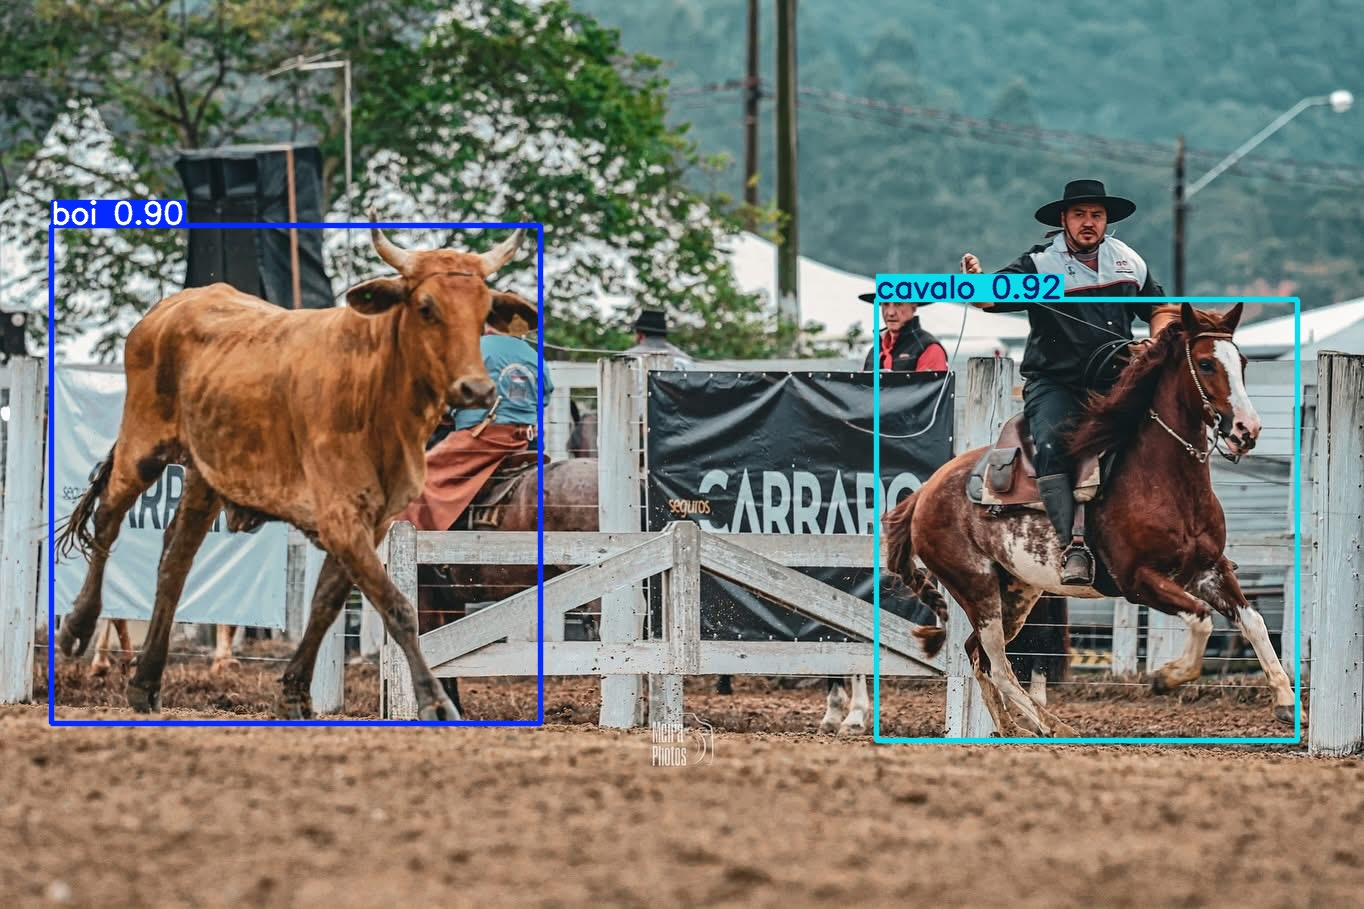

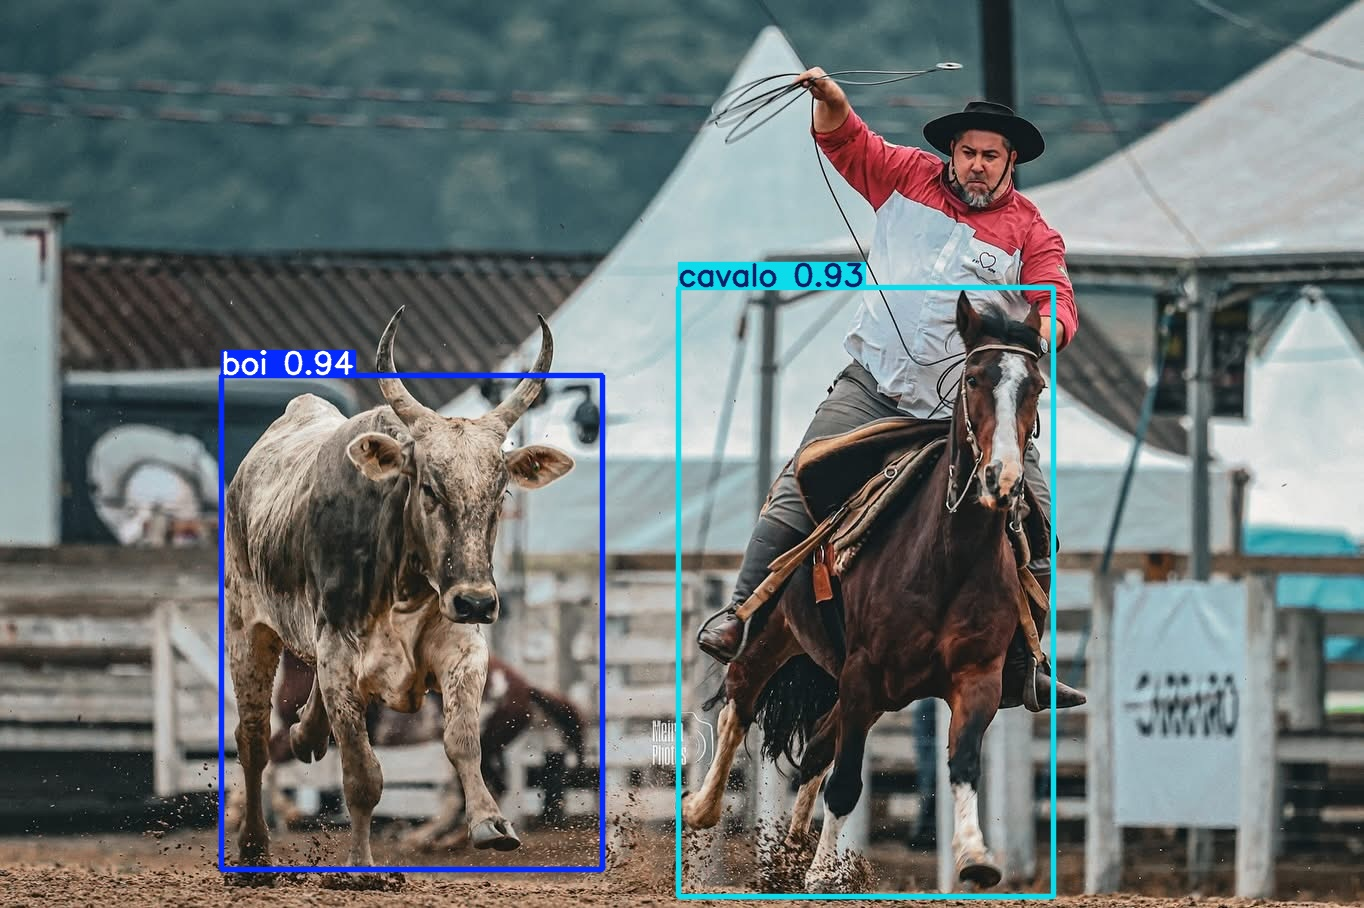

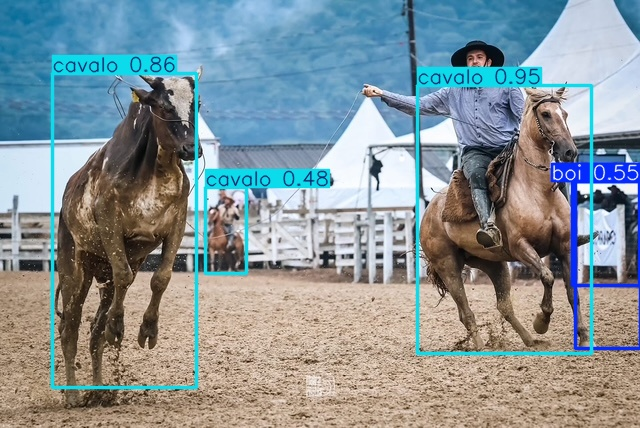

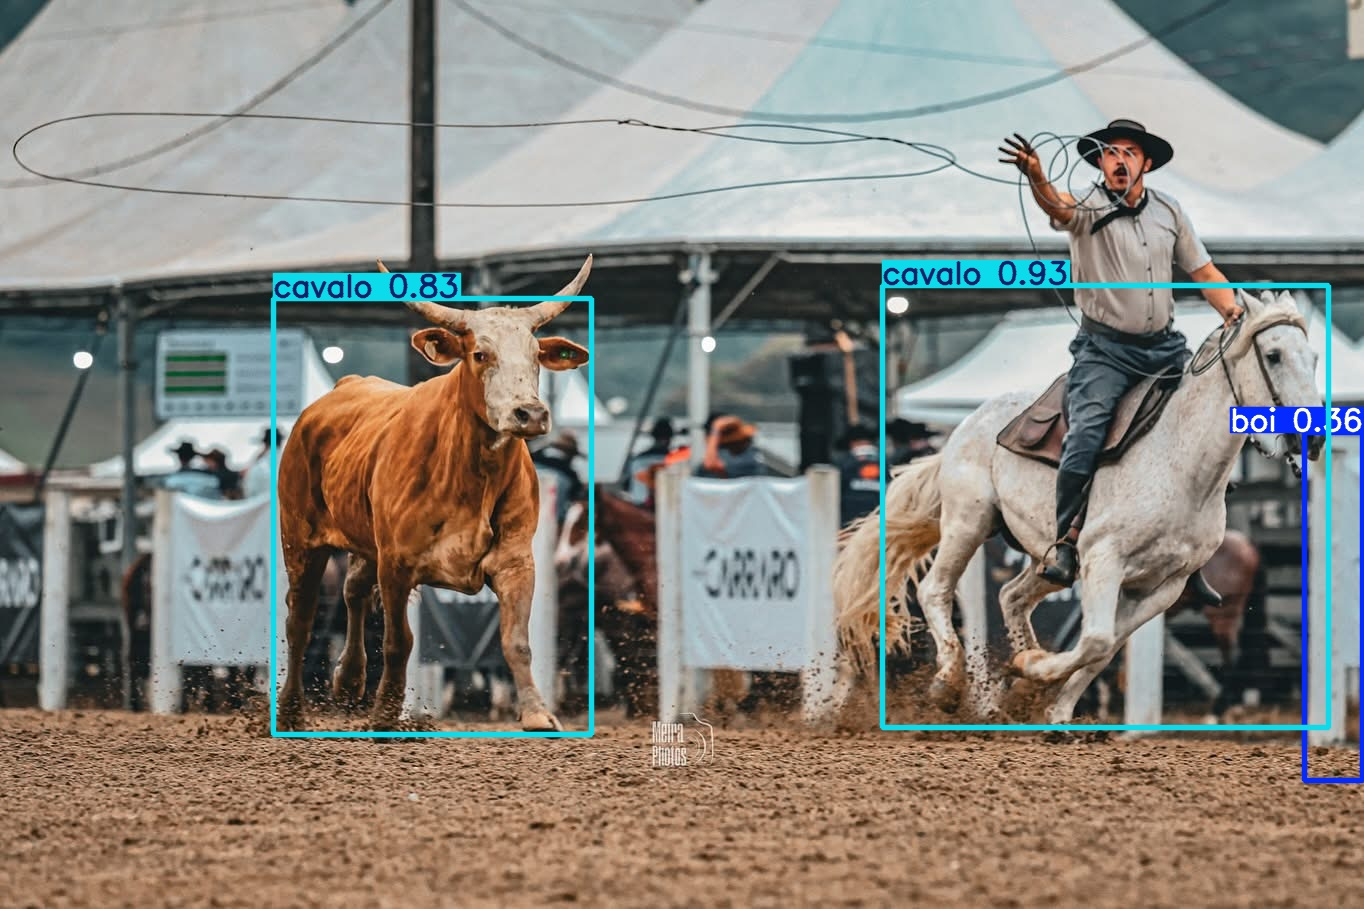

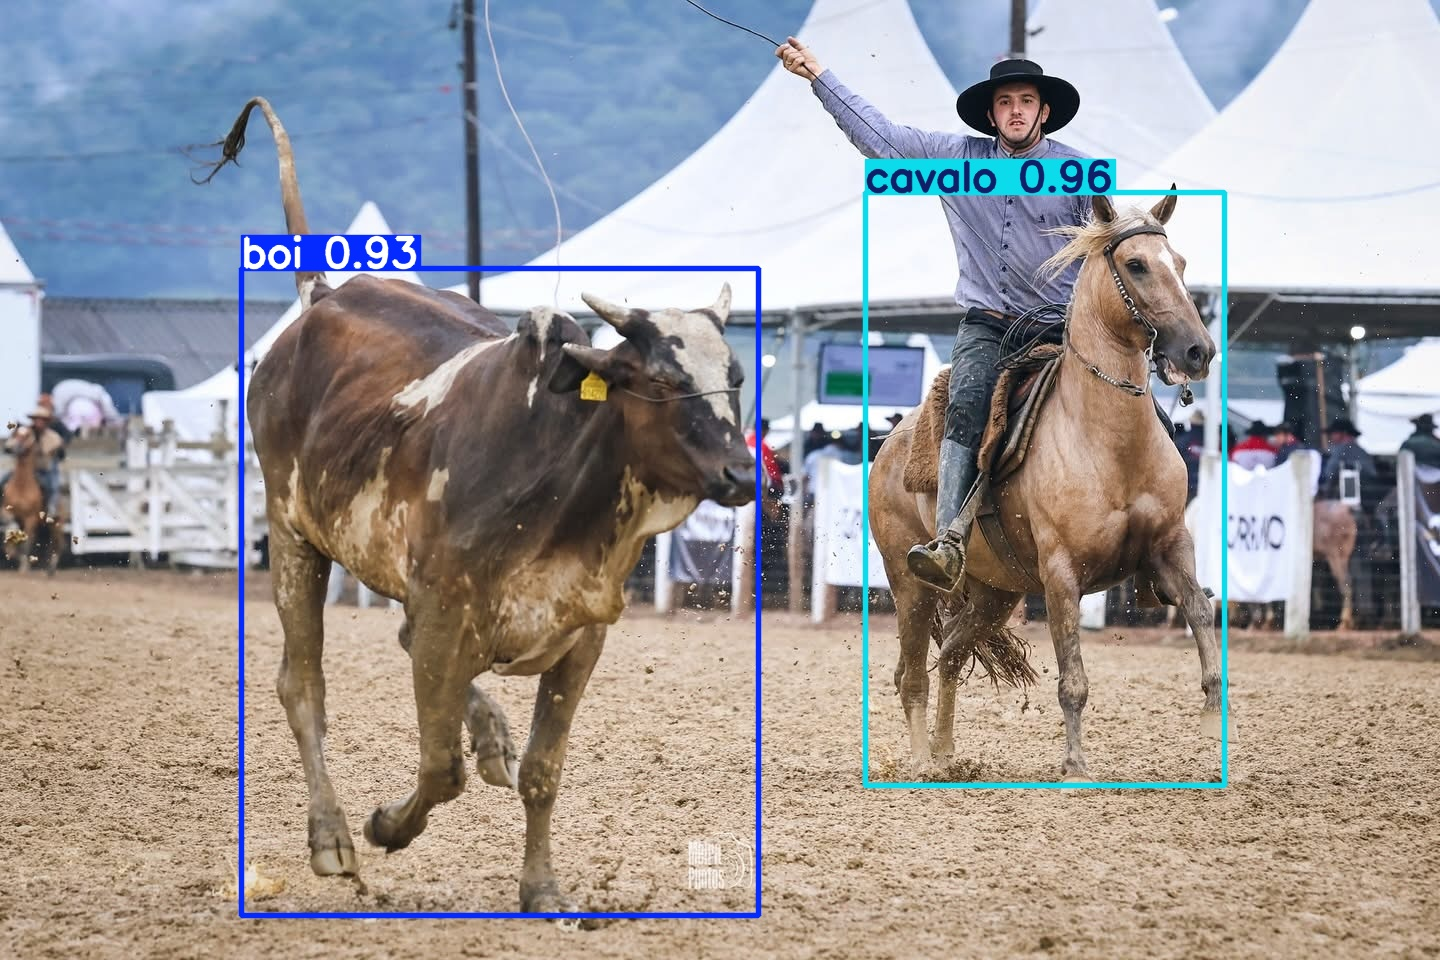

In [ ]:
from IPython.display import Image, display

imagens = [
    "runs/detect/predict/IMG_ined1.jpg",
    "runs/detect/predict/IMG_ined2.jpg",
    "runs/detect/predict/IMG_ined3.jpg",
    "runs/detect/predict/IMG_ined4.jpg",
    "runs/detect/predict/IMG_ined5.jpg"
]

for img_path in imagens:
    display(Image(filename=img_path))


In [17]:
model.predict(
    source=f"{dataset.location}/test/images",
    save=True,
    save_crop=True,
    imgsz=640,
    batch=16
)



image 1/20 /content/detecta-animais-1/test/images/images-2-_jpg.rf.043823b5d71250a495cd6a0ba56f75db.jpg: 640x640 1 boi, 2 cavalos, 4.6ms
image 2/20 /content/detecta-animais-1/test/images/img106_jpeg.rf.81ac34a9c78f4fe6cff7324b32fa6bef.jpg: 640x640 2 bois, 1 cavalo, 4.6ms
image 3/20 /content/detecta-animais-1/test/images/img112_jpeg.rf.0d4877fce486b314ebb7fb45f1815b00.jpg: 640x640 1 boi, 2 cavalos, 4.6ms
image 4/20 /content/detecta-animais-1/test/images/img132_jpeg.rf.a3724ab2b50ed6cbb390e65d86bef9f8.jpg: 640x640 1 boi, 1 cavalo, 4.6ms
image 5/20 /content/detecta-animais-1/test/images/img133_jpeg.rf.5dd226cdbc2a4c72073b12714e97f42a.jpg: 640x640 1 boi, 3 cavalos, 4.6ms
image 6/20 /content/detecta-animais-1/test/images/img152_jpeg.rf.354f3dc0ac7aa6558b11da5da98e1b5d.jpg: 640x640 1 boi, 1 cavalo, 4.6ms
image 7/20 /content/detecta-animais-1/test/images/img166_jpeg.rf.a23392854f83ff8f8301f08ba14d16a1.jpg: 640x640 1 boi, 1 cavalo, 4.6ms
image 8/20 /content/detecta-animais-1/test/images/img18

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'boi', 1: 'cavalo'}
 obb: None
 orig_img: array([[[221, 185, 175],
         [222, 187, 174],
         [230, 192, 180],
         ...,
         [218, 192, 175],
         [218, 192, 175],
         [218, 192, 175]],
 
        [[221, 185, 175],
         [222, 187, 174],
         [230, 192, 180],
         ...,
         [218, 192, 175],
         [218, 192, 175],
         [218, 192, 175]],
 
        [[221, 185, 175],
         [222, 187, 174],
         [230, 192, 180],
         ...,
         [218, 192, 175],
         [218, 192, 175],
         [218, 192, 175]],
 
        ...,
 
        [[134, 156, 184],
         [134, 156, 184],
         [134, 156, 184],
         ...,
         [131, 153, 181],
         [130, 153, 179],
         [130, 153, 179]],
 
        [[136, 158, 186],
         [136, 158, 186],
         [135, 157, 185],
         ...,
        

In [18]:
!ls runs/detect/predict/crops


boi  cavalo


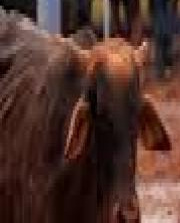

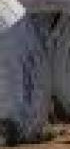

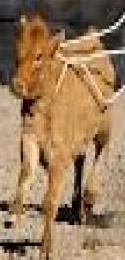

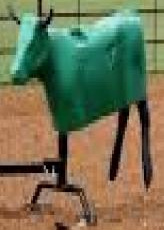

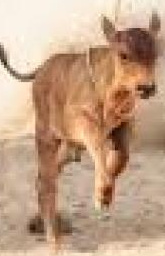

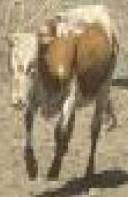

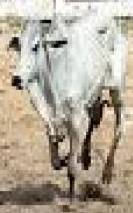

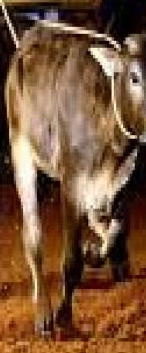

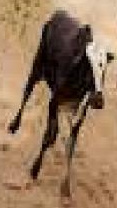

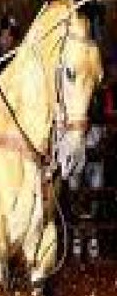

In [19]:
import glob
from IPython.display import Image, display

crops = glob.glob('runs/detect/predict/crops/*/*.jpg')[:10]  # pega os primeiros 10 crops

for crop in crops:
    display(Image(filename=crop))
